In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
matches = pd.read_csv('WorldCupMatches.csv')

In [3]:
players = pd.read_csv('WorldCupPlayers.csv')

In [4]:
wcs = pd.read_csv('WorldCups.csv')

In [5]:
matches.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


In [6]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  852 non-null    float64
 1   Datetime              852 non-null    object 
 2   Stage                 852 non-null    object 
 3   Stadium               852 non-null    object 
 4   City                  852 non-null    object 
 5   Home Team Name        852 non-null    object 
 6   Home Team Goals       852 non-null    float64
 7   Away Team Goals       852 non-null    float64
 8   Away Team Name        852 non-null    object 
 9   Win conditions        852 non-null    object 
 10  Attendance            850 non-null    float64
 11  Half-time Home Goals  852 non-null    float64
 12  Half-time Away Goals  852 non-null    float64
 13  Referee               852 non-null    object 
 14  Assistant 1           852 non-null    object 
 15  Assistant 2          

In [7]:
wc_matches = matches.copy()

In [8]:
wc_matches = wc_matches.drop(columns=['Stadium', 'City', 'Win conditions', 'Attendance', 'Referee', 
                      'Assistant 1', 'Assistant 2', 'Home Team Initials', 'Away Team Initials'])

In [9]:
wc_matches.head()

,Year,Datetime,Stage,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Half-time Home Goals,Half-time Away Goals,RoundID,MatchID
0,1930.0,13 Jul 1930 - 15:00,Group 1,France,4.0,1.0,Mexico,3.0,0.0,201.0,1096.0
1,1930.0,13 Jul 1930 - 15:00,Group 4,USA,3.0,0.0,Belgium,2.0,0.0,201.0,1090.0
2,1930.0,14 Jul 1930 - 12:45,Group 2,Yugoslavia,2.0,1.0,Brazil,2.0,0.0,201.0,1093.0
3,1930.0,14 Jul 1930 - 14:50,Group 3,Romania,3.0,1.0,Peru,1.0,0.0,201.0,1098.0
4,1930.0,15 Jul 1930 - 16:00,Group 1,Argentina,1.0,0.0,France,0.0,0.0,201.0,1085.0


In [10]:
wcs.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607


In [11]:
wcs = wcs.drop(columns=['Attendance'])

In [12]:
players.head()

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN


In [13]:
players.shape

(37784, 9)

In [14]:
wcs.shape

(20, 9)

In [15]:
wc_matches.shape

(4572, 11)

In [16]:
wc_matches.isnull().sum()

Year                    3720
Datetime                3720
Stage                   3720
Home Team Name          3720
Home Team Goals         3720
Away Team Goals         3720
Away Team Name          3720
Half-time Home Goals    3720
Half-time Away Goals    3720
RoundID                 3720
MatchID                 3720
dtype: int64

In [17]:
4572 - 3720

852

In [18]:
wc_matches.head()

,Year,Datetime,Stage,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Half-time Home Goals,Half-time Away Goals,RoundID,MatchID
0,1930.0,13 Jul 1930 - 15:00,Group 1,France,4.0,1.0,Mexico,3.0,0.0,201.0,1096.0
1,1930.0,13 Jul 1930 - 15:00,Group 4,USA,3.0,0.0,Belgium,2.0,0.0,201.0,1090.0
2,1930.0,14 Jul 1930 - 12:45,Group 2,Yugoslavia,2.0,1.0,Brazil,2.0,0.0,201.0,1093.0
3,1930.0,14 Jul 1930 - 14:50,Group 3,Romania,3.0,1.0,Peru,1.0,0.0,201.0,1098.0
4,1930.0,15 Jul 1930 - 16:00,Group 1,Argentina,1.0,0.0,France,0.0,0.0,201.0,1085.0


## Todo wc_matches:
- remove all na values
- separate date from time
- Change stage to an integer
- Remove half-time goals
- add winner column 
- add goal difference column

In [19]:
wc_matches = wc_matches.drop(columns=['Half-time Home Goals', 'Half-time Away Goals'])

In [20]:
wc_matches['Date'] = pd.to_datetime(wc_matches['Datetime'])

In [21]:
wc_matches = wc_matches.drop(columns=['Datetime'])

In [22]:
wc_matches = wc_matches.dropna()

In [23]:
wc_matches['new_date'] = [d.date() for d in wc_matches['Date']]
wc_matches['new_time'] = [d.time() for d in wc_matches['Date']]

In [24]:
wc_matches.head()

,Year,Stage,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,RoundID,MatchID,Date,new_date,new_time
0,1930.0,Group 1,France,4.0,1.0,Mexico,201.0,1096.0,1930-07-13 15:00:00,1930-07-13,15:00:00
1,1930.0,Group 4,USA,3.0,0.0,Belgium,201.0,1090.0,1930-07-13 15:00:00,1930-07-13,15:00:00
2,1930.0,Group 2,Yugoslavia,2.0,1.0,Brazil,201.0,1093.0,1930-07-14 12:45:00,1930-07-14,12:45:00
3,1930.0,Group 3,Romania,3.0,1.0,Peru,201.0,1098.0,1930-07-14 14:50:00,1930-07-14,14:50:00
4,1930.0,Group 1,Argentina,1.0,0.0,France,201.0,1085.0,1930-07-15 16:00:00,1930-07-15,16:00:00


In [25]:
stages = wc_matches['Stage']

In [26]:
from IPython.display import display

groups = []
#loop over all categorical variables
for col in stages:
    # Perform groupby for each categorical variable
    if (col.__contains__('Group')):
        groups.append(32)
    elif (col.__contains__('Quarter')):
        groups.append(8)
    elif (col.__contains__('Semi')):
        groups.append(4)
    elif (col == 'Final'):
        groups.append(2)
    elif (col.__contains__('16')):
        groups.append(16)
    elif (col.__contains__('third')):
        groups.append(4)
    elif (col.__contains__('Third')):
        groups.append(4)
    elif (col.__contains__('Preliminary')):
        groups.append(16)
    elif (col.__contains__('Preliminary')):
            groups.append(16)
    elif (col == 'First round'):
            groups.append(16)
    else:
        groups.append(col)


In [27]:
wc_matches['groups'] = groups

In [28]:
wc_matches = wc_matches.drop(columns=['Stage'])


In [29]:
wc_matches = wc_matches.drop(columns=['Date'])

In [30]:
time = wc_matches['new_time']

In [31]:
# wc_matches['new_time'].dtypes

In [32]:
time

0      15:00:00
1      15:00:00
2      12:45:00
3      14:50:00
4      16:00:00
         ...   
847    17:00:00
848    17:00:00
849    17:00:00
850    17:00:00
851    16:00:00
Name: new_time, Length: 852, dtype: object

In [33]:
# wc_matches['new_time'] = wc_matches['new_time'].astype("string")

In [34]:
wc_matches.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 852 entries, 0 to 851
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             852 non-null    float64
 1   Home Team Name   852 non-null    object 
 2   Home Team Goals  852 non-null    float64
 3   Away Team Goals  852 non-null    float64
 4   Away Team Name   852 non-null    object 
 5   RoundID          852 non-null    float64
 6   MatchID          852 non-null    float64
 7   new_date         852 non-null    object 
 8   new_time         852 non-null    object 
 9   groups           852 non-null    int64  
dtypes: float64(5), int64(1), object(4)
memory usage: 73.2+ KB


In [35]:
timed = []

for col in time:
    time = time.astype('string')
    timed.append(time.str[:2].astype('int'))



In [36]:
wc_matches.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 852 entries, 0 to 851
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             852 non-null    float64
 1   Home Team Name   852 non-null    object 
 2   Home Team Goals  852 non-null    float64
 3   Away Team Goals  852 non-null    float64
 4   Away Team Name   852 non-null    object 
 5   RoundID          852 non-null    float64
 6   MatchID          852 non-null    float64
 7   new_date         852 non-null    object 
 8   new_time         852 non-null    object 
 9   groups           852 non-null    int64  
dtypes: float64(5), int64(1), object(4)
memory usage: 73.2+ KB


In [37]:
wc_matches['time'] = timed

In [38]:
wc_matches.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 852 entries, 0 to 851
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             852 non-null    float64
 1   Home Team Name   852 non-null    object 
 2   Home Team Goals  852 non-null    float64
 3   Away Team Goals  852 non-null    float64
 4   Away Team Name   852 non-null    object 
 5   RoundID          852 non-null    float64
 6   MatchID          852 non-null    float64
 7   new_date         852 non-null    object 
 8   new_time         852 non-null    object 
 9   groups           852 non-null    int64  
 10  time             852 non-null    object 
dtypes: float64(5), int64(1), object(5)
memory usage: 79.9+ KB


In [39]:
wc_matches.head()

,Year,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,RoundID,MatchID,new_date,new_time,groups,time
0,1930.0,France,4.0,1.0,Mexico,201.0,1096.0,1930-07-13,15:00:00,32,0 15 1 15 2 12 3 14 4 ...
1,1930.0,USA,3.0,0.0,Belgium,201.0,1090.0,1930-07-13,15:00:00,32,0 15 1 15 2 12 3 14 4 ...
2,1930.0,Yugoslavia,2.0,1.0,Brazil,201.0,1093.0,1930-07-14,12:45:00,32,0 15 1 15 2 12 3 14 4 ...
3,1930.0,Romania,3.0,1.0,Peru,201.0,1098.0,1930-07-14,14:50:00,32,0 15 1 15 2 12 3 14 4 ...
4,1930.0,Argentina,1.0,0.0,France,201.0,1085.0,1930-07-15,16:00:00,32,0 15 1 15 2 12 3 14 4 ...


In [40]:
#Adding goal difference and establishing who is the winner 
winner = []
for i in range (len(wc_matches['Home Team Name'])):
    if wc_matches['Home Team Goals'][i] > wc_matches['Away Team Goals'][i]:
        winner.append(wc_matches['Home Team Name'][i])
    elif wc_matches['Home Team Goals'][i] < wc_matches['Away Team Goals'][i]:
        winner.append(wc_matches['Away Team Name'][i])
    else:
        winner.append('Draw')
wc_matches['winning_team'] = winner

#adding goal difference column
wc_matches['goal_difference'] = np.absolute(wc_matches['Home Team Goals'] - wc_matches['Away Team Goals'])

# wc_matches

In [41]:
wc_matches.head()

,Year,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,RoundID,MatchID,new_date,new_time,groups,time,winning_team,goal_difference
0,1930.0,France,4.0,1.0,Mexico,201.0,1096.0,1930-07-13,15:00:00,32,0 15 1 15 2 12 3 14 4 ...,France,3.0
1,1930.0,USA,3.0,0.0,Belgium,201.0,1090.0,1930-07-13,15:00:00,32,0 15 1 15 2 12 3 14 4 ...,USA,3.0
2,1930.0,Yugoslavia,2.0,1.0,Brazil,201.0,1093.0,1930-07-14,12:45:00,32,0 15 1 15 2 12 3 14 4 ...,Yugoslavia,1.0
3,1930.0,Romania,3.0,1.0,Peru,201.0,1098.0,1930-07-14,14:50:00,32,0 15 1 15 2 12 3 14 4 ...,Romania,2.0
4,1930.0,Argentina,1.0,0.0,France,201.0,1085.0,1930-07-15,16:00:00,32,0 15 1 15 2 12 3 14 4 ...,Argentina,1.0


In [42]:
wc_matches = wc_matches.drop(columns=['time'])

In [43]:
wc_matches.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 852 entries, 0 to 851
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             852 non-null    float64
 1   Home Team Name   852 non-null    object 
 2   Home Team Goals  852 non-null    float64
 3   Away Team Goals  852 non-null    float64
 4   Away Team Name   852 non-null    object 
 5   RoundID          852 non-null    float64
 6   MatchID          852 non-null    float64
 7   new_date         852 non-null    object 
 8   new_time         852 non-null    object 
 9   groups           852 non-null    int64  
 10  winning_team     852 non-null    object 
 11  goal_difference  852 non-null    float64
dtypes: float64(6), int64(1), object(5)
memory usage: 118.8+ KB


In [44]:
wc_matches.head()

,Year,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,RoundID,MatchID,new_date,new_time,groups,winning_team,goal_difference
0,1930.0,France,4.0,1.0,Mexico,201.0,1096.0,1930-07-13,15:00:00,32,France,3.0
1,1930.0,USA,3.0,0.0,Belgium,201.0,1090.0,1930-07-13,15:00:00,32,USA,3.0
2,1930.0,Yugoslavia,2.0,1.0,Brazil,201.0,1093.0,1930-07-14,12:45:00,32,Yugoslavia,1.0
3,1930.0,Romania,3.0,1.0,Peru,201.0,1098.0,1930-07-14,14:50:00,32,Romania,2.0
4,1930.0,Argentina,1.0,0.0,France,201.0,1085.0,1930-07-15,16:00:00,32,Argentina,1.0


In [45]:
wc_matches.shape

(852, 12)

In [46]:
#Adding goal difference and establishing who is the winner 
home_win = []

for i in range (len(wc_matches['Home Team Name'])):
    if wc_matches['winning_team'][i] == wc_matches['Home Team Name'][i]:
        home_win.append(1)
    elif wc_matches['winning_team'][i] == wc_matches['Away Team Name'][i]:
        home_win.append(0)
    else:
        home_win.append(3)
            


wc_matches['home_win'] = home_win


In [47]:
wc_matches.head()

,Year,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,RoundID,MatchID,new_date,new_time,groups,winning_team,goal_difference,home_win
0,1930.0,France,4.0,1.0,Mexico,201.0,1096.0,1930-07-13,15:00:00,32,France,3.0,1
1,1930.0,USA,3.0,0.0,Belgium,201.0,1090.0,1930-07-13,15:00:00,32,USA,3.0,1
2,1930.0,Yugoslavia,2.0,1.0,Brazil,201.0,1093.0,1930-07-14,12:45:00,32,Yugoslavia,1.0,1
3,1930.0,Romania,3.0,1.0,Peru,201.0,1098.0,1930-07-14,14:50:00,32,Romania,2.0,1
4,1930.0,Argentina,1.0,0.0,France,201.0,1085.0,1930-07-15,16:00:00,32,Argentina,1.0,1


In [48]:
wc_matches.drop(columns=['winning_team'])

,Year,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,RoundID,MatchID,new_date,new_time,groups,goal_difference,home_win
0,1930.0,France,4.0,1.0,Mexico,201.0,1096.0,1930-07-13,15:00:00,32,3.0,1
1,1930.0,USA,3.0,0.0,Belgium,201.0,1090.0,1930-07-13,15:00:00,32,3.0,1
2,1930.0,Yugoslavia,2.0,1.0,Brazil,201.0,1093.0,1930-07-14,12:45:00,32,1.0,1
3,1930.0,Romania,3.0,1.0,Peru,201.0,1098.0,1930-07-14,14:50:00,32,2.0,1
4,1930.0,Argentina,1.0,0.0,France,201.0,1085.0,1930-07-15,16:00:00,32,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
847,2014.0,Netherlands,0.0,0.0,Costa Rica,255953.0,300186488.0,2014-07-05,17:00:00,8,0.0,3
848,2014.0,Brazil,1.0,7.0,Germany,255955.0,300186474.0,2014-07-08,17:00:00,4,6.0,0
849,2014.0,Netherlands,0.0,0.0,Argentina,255955.0,300186490.0,2014-07-09,17:00:00,4,0.0,3
850,2014.0,Brazil,0.0,3.0,Netherlands,255957.0,300186502.0,2014-07-12,17:00:00,4,3.0,0


In [49]:
wc_matches.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 852 entries, 0 to 851
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             852 non-null    float64
 1   Home Team Name   852 non-null    object 
 2   Home Team Goals  852 non-null    float64
 3   Away Team Goals  852 non-null    float64
 4   Away Team Name   852 non-null    object 
 5   RoundID          852 non-null    float64
 6   MatchID          852 non-null    float64
 7   new_date         852 non-null    object 
 8   new_time         852 non-null    object 
 9   groups           852 non-null    int64  
 10  winning_team     852 non-null    object 
 11  goal_difference  852 non-null    float64
 12  home_win         852 non-null    int64  
dtypes: float64(6), int64(2), object(5)
memory usage: 125.5+ KB


In [50]:
# can't vectorize with date or time
wc_matches.drop(columns=['new_date', 'new_time'])

,Year,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,RoundID,MatchID,groups,winning_team,goal_difference,home_win
0,1930.0,France,4.0,1.0,Mexico,201.0,1096.0,32,France,3.0,1
1,1930.0,USA,3.0,0.0,Belgium,201.0,1090.0,32,USA,3.0,1
2,1930.0,Yugoslavia,2.0,1.0,Brazil,201.0,1093.0,32,Yugoslavia,1.0,1
3,1930.0,Romania,3.0,1.0,Peru,201.0,1098.0,32,Romania,2.0,1
4,1930.0,Argentina,1.0,0.0,France,201.0,1085.0,32,Argentina,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
847,2014.0,Netherlands,0.0,0.0,Costa Rica,255953.0,300186488.0,8,Draw,0.0,3
848,2014.0,Brazil,1.0,7.0,Germany,255955.0,300186474.0,4,Germany,6.0,0
849,2014.0,Netherlands,0.0,0.0,Argentina,255955.0,300186490.0,4,Draw,0.0,3
850,2014.0,Brazil,0.0,3.0,Netherlands,255957.0,300186502.0,4,Netherlands,3.0,0


In [51]:
from sklearn.model_selection import train_test_split

In [52]:
df_train_full, df_test = train_test_split(wc_matches, test_size=0.2, random_state=1)

In [53]:
df_train_full.head()

,Year,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,RoundID,MatchID,new_date,new_time,groups,winning_team,goal_difference,home_win
223,1970.0,Mexico,1.0,0.0,Belgium,250.0,1752.0,1970-06-11,16:00:00,32,Mexico,1.0,1
673,2006.0,Togo,0.0,2.0,Switzerland,97410100.0,97410030.0,2006-06-19,15:00:00,32,Switzerland,2.0,0
134,1958.0,France,6.0,3.0,Germany FR,3483.0,1382.0,1958-06-28,17:00:00,4,France,3.0,1
622,2002.0,Ecuador,1.0,0.0,Croatia,43950100.0,43950044.0,2002-06-13,20:30:00,32,Ecuador,1.0,1
104,1958.0,Hungary,1.0,1.0,Wales,220.0,1407.0,1958-06-08,19:00:00,32,Draw,0.0,3


In [54]:
df_train, df_val = train_test_split(df_train_full, test_size=0.33, random_state=11)

In [55]:
y_train = df_train.home_win.values

In [56]:
y_val = df_val.home_win.values

In [57]:
del df_train['home_win']

In [58]:
del df_val['home_win']

In [59]:
df_train_full.isnull().sum()

Year               0
Home Team Name     0
Home Team Goals    0
Away Team Goals    0
Away Team Name     0
RoundID            0
MatchID            0
new_date           0
new_time           0
groups             0
winning_team       0
goal_difference    0
home_win           0
dtype: int64

In [60]:
df_train_full.home_win.value_counts()

1    397
3    149
0    135
Name: home_win, dtype: int64

In [61]:
397+149+135

681

In [62]:
397/681

0.5829662261380323

## 58% of home teams won


In [63]:
global_mean = df_train_full.home_win.mean()

In [64]:
round(global_mean, 3)

1.239

In [65]:
categorical = ['Home Team Name', 'Away Team Name']
numerical = ['Year', 'Home Team Goals', 'Away Team Goals', 'RoundID', 'MatchID', 'groups', 
             'goal_difference']

In [66]:
df_train_full[categorical].nunique()

Home Team Name    74
Away Team Name    83
dtype: int64

In [67]:
from IPython.display import display

#loop over all categorical variables
for col in categorical:
    # Perform groupby for each categorical variable
    df_group = df_train_full.groupby(by=col).home_win.agg(['mean'])
    df_group['diff'] = df_group['mean'] - global_mean
    df_group['rate'] = df_group['mean'] / global_mean
    
    # Display the resulting dataframe
    display(df_group)

,mean,diff,rate
Home Team Name,,,
Algeria,1.4,0.160646,1.129621
Angola,0.0,-1.239354,0.000000
Argentina,1.0,-0.239354,0.806872
Australia,1.0,-0.239354,0.806872
Austria,1.0,-0.239354,0.806872
...,...,...,...
Zaire,0.0,-1.239354,0.000000
"rn"">Republic of Ireland",3.0,1.760646,2.420616
"rn"">Serbia and Montenegro",0.0,-1.239354,0.000000


,mean,diff,rate
Away Team Name,,,
Algeria,0.833333,-0.406021,0.672393
Angola,3.000000,1.760646,2.420616
Argentina,1.450000,0.210646,1.169964
Australia,1.666667,0.427313,1.344787
Austria,1.307692,0.068338,1.055140
...,...,...,...
"rn"">Bosnia and Herzegovina",1.000000,-0.239354,0.806872
"rn"">Republic of Ireland",1.833333,0.593979,1.479265
"rn"">Serbia and Montenegro",1.000000,-0.239354,0.806872


In [68]:
from sklearn.metrics import mutual_info_score

# create a stand-alone function for calculating mutual information
def calculate_mi(series):
    # use the mutual_info_score function from scikit learn
    return mutual_info_score(series, df_train_full.home_win)

# Apply the function from above to each categorical column of the dataset
df_mi = df_train_full[categorical].apply(calculate_mi)

# Sort teh values of the result
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')
df_mi

,MI
Home Team Name,0.184936
Away Team Name,0.155173


# most imoportand features is new_date

In [69]:
df_train_full[numerical].corrwith(df_train_full.home_win)

Year              -0.013320
Home Team Goals   -0.107992
Away Team Goals   -0.307969
RoundID           -0.014540
MatchID           -0.052894
groups             0.069731
goal_difference   -0.484492
dtype: float64

In [70]:
df_train.head()

,Year,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,RoundID,MatchID,new_date,new_time,groups,winning_team,goal_difference
79,1954.0,Germany FR,4.0,1.0,Turkey,211.0,1283.0,1954-06-17,18:00:00,32,Germany FR,3.0
24,1934.0,Italy,7.0,1.0,USA,204.0,1135.0,1934-05-27,16:30:00,16,Italy,6.0
290,1978.0,Brazil,1.0,0.0,Austria,278.0,2215.0,1978-06-11,13:45:00,32,Brazil,1.0
378,1986.0,Northern Ireland,1.0,2.0,Spain,308.0,551.0,1986-06-07,12:00:00,32,Spain,1.0
122,1958.0,France,2.0,1.0,Scotland,220.0,1387.0,1958-06-15,19:00:00,32,France,1.0


In [71]:
train_dict = df_train[categorical + numerical].to_dict(orient='records')

In [72]:
train_dict

[{'Home Team Name': 'Germany FR',
  'Away Team Name': 'Turkey',
  'Year': 1954.0,
  'Home Team Goals': 4.0,
  'Away Team Goals': 1.0,
  'RoundID': 211.0,
  'MatchID': 1283.0,
  'groups': 32,
  'goal_difference': 3.0},
 {'Home Team Name': 'Italy',
  'Away Team Name': 'USA',
  'Year': 1934.0,
  'Home Team Goals': 7.0,
  'Away Team Goals': 1.0,
  'RoundID': 204.0,
  'MatchID': 1135.0,
  'groups': 16,
  'goal_difference': 6.0},
 {'Home Team Name': 'Brazil',
  'Away Team Name': 'Austria',
  'Year': 1978.0,
  'Home Team Goals': 1.0,
  'Away Team Goals': 0.0,
  'RoundID': 278.0,
  'MatchID': 2215.0,
  'groups': 32,
  'goal_difference': 1.0},
 {'Home Team Name': 'Northern Ireland',
  'Away Team Name': 'Spain',
  'Year': 1986.0,
  'Home Team Goals': 1.0,
  'Away Team Goals': 2.0,
  'RoundID': 308.0,
  'MatchID': 551.0,
  'groups': 32,
  'goal_difference': 1.0},
 {'Home Team Name': 'France',
  'Away Team Name': 'Scotland',
  'Year': 1958.0,
  'Home Team Goals': 2.0,
  'Away Team Goals': 1.0,
  '

In [73]:
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

DictVectorizer(sparse=False)

In [74]:
X_train = dv.transform(train_dict)

In [75]:
X_train[0]

array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 4.000e+00, 0.000e+00, 0.000e+00, 

In [76]:
dv.get_feature_names()

/Users/ryantalbot/opt/anaconda3/envs/tf2/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['Away Team Goals',
 'Away Team Name=Algeria',
 'Away Team Name=Angola',
 'Away Team Name=Argentina',
 'Away Team Name=Australia',
 'Away Team Name=Austria',
 'Away Team Name=Belgium',
 'Away Team Name=Bolivia',
 'Away Team Name=Brazil',
 'Away Team Name=Bulgaria',
 'Away Team Name=Cameroon',
 'Away Team Name=Canada',
 'Away Team Name=Chile',
 'Away Team Name=Colombia',
 'Away Team Name=Costa Rica',
 'Away Team Name=Croatia',
 'Away Team Name=Cuba',
 'Away Team Name=Czech Republic',
 'Away Team Name=Czechoslovakia',
 "Away Team Name=C�te d'Ivoire",
 'Away Team Name=Denmark',
 'Away Team Name=Dutch East Indies',
 'Away Team Name=Ecuador',
 'Away Team Name=Egypt',
 'Away Team Name=El Salvador',
 'Away Team Name=England',
 'Away Team Name=France',
 'Away Team Name=Germany',
 'Away Team Name=Germany FR',
 'Away Team Name=Ghana',
 'Away Team Name=Greece',
 'Away Team Name=Honduras',
 'Away Team Name=Hungary',
 'Away Team Name=IR Iran',
 'Away Team Name=Iran',
 'Away Team Name=Iraq',
 'Away 

In [77]:
def logistic_regression(xi):
    score = bias
    for j in range(n):
        score = score + xi[j] * w[j]
        
    prob = sigmoid(score)
    return prob

In [78]:
import math

def sigmoid(score):
    return 1 / (1 + math.exp(-score))

In [79]:
from sklearn.linear_model import LogisticRegression

In [80]:
model = LogisticRegression(solver='liblinear', random_state=1)
model.fit(X_train, y_train)

LogisticRegression(random_state=1, solver='liblinear')

In [81]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [82]:
y_pred = model.predict_proba(X_val)

In [83]:
model.predict_proba(X_val)

array([[0.21221643, 0.52729406, 0.26048951],
       [0.13392107, 0.54182391, 0.32425502],
       [0.21221681, 0.5272935 , 0.26048969],
       [0.21221613, 0.5272945 , 0.26048937],
       [0.13189237, 0.54438721, 0.32372042],
       [0.13290309, 0.54310798, 0.32398893],
       [0.13293979, 0.54306898, 0.32399123],
       [0.29755592, 0.43215324, 0.27029084],
       [0.29752072, 0.43217793, 0.27030134],
       [0.13191027, 0.5443659 , 0.32372383],
       [0.13290317, 0.54310778, 0.32398905],
       [0.2971535 , 0.43260521, 0.27024128],
       [0.13290378, 0.5431067 , 0.32398952],
       [0.13191028, 0.54436602, 0.3237237 ],
       [0.13224556, 0.54394052, 0.32381392],
       [0.34453867, 0.47318589, 0.18227544],
       [0.29713011, 0.43262843, 0.27024145],
       [0.21221597, 0.52729473, 0.26048931],
       [0.21221702, 0.52729345, 0.26048952],
       [0.13395692, 0.54178676, 0.32425632],
       [0.2122156 , 0.52729525, 0.26048915],
       [0.13191924, 0.54435595, 0.32372481],
       [0.

In [84]:
y_pred = model.predict_proba(X_val)[:, 1]

In [85]:
y_pred >= 0.5

array([ True,  True,  True,  True,  True,  True,  True, False, False,
        True,  True, False,  True,  True,  True, False, False,  True,
        True,  True,  True,  True, False, False, False, False,  True,
        True, False,  True, False,  True,  True,  True,  True, False,
        True,  True,  True, False,  True, False, False,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
       False, False, False, False, False,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True, False, False,  True,  True,  True,
       False,  True, False,  True,  True,  True,  True, False,  True,
        True, False,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True, False,  True, False,
        True,  True,  True, False, False,  True,  True,  True,  True,
        True,  True,

In [86]:
home_win = y_pred >= 0.5

In [87]:
(y_val == home_win).mean()

0.5777777777777777

# Model Interpretation????

In [88]:
dict(zip(dv.get_feature_names_out(), model.coef_[0].round(5)))

{'Away Team Goals': 0.0,
 'Away Team Name=Algeria': -0.0,
 'Away Team Name=Angola': -0.0,
 'Away Team Name=Argentina': -0.0,
 'Away Team Name=Australia': -0.0,
 'Away Team Name=Austria': -0.0,
 'Away Team Name=Belgium': 0.0,
 'Away Team Name=Bolivia': -0.0,
 'Away Team Name=Brazil': 0.0,
 'Away Team Name=Bulgaria': -0.0,
 'Away Team Name=Cameroon': -0.0,
 'Away Team Name=Canada': -0.0,
 'Away Team Name=Chile': -0.0,
 'Away Team Name=Colombia': -0.0,
 'Away Team Name=Costa Rica': 0.0,
 'Away Team Name=Croatia': 0.0,
 'Away Team Name=Cuba': -0.0,
 'Away Team Name=Czech Republic': 0.0,
 'Away Team Name=Czechoslovakia': -0.0,
 "Away Team Name=C�te d'Ivoire": -0.0,
 'Away Team Name=Denmark': 0.0,
 'Away Team Name=Dutch East Indies': -0.0,
 'Away Team Name=Ecuador': 0.0,
 'Away Team Name=Egypt': -0.0,
 'Away Team Name=El Salvador': -0.0,
 'Away Team Name=England': -0.0,
 'Away Team Name=France': -0.0,
 'Away Team Name=Germany': 0.0,
 'Away Team Name=Germany FR': 0.0,
 'Away Team Name=Ghana':

In [89]:
# get the predictions from the model
y_pred = model.predict_proba(X_val)[:, 1]

churn = y_pred >= 0.5
(churn == y_val).mean()

0.5777777777777777

In [90]:
from sklearn.metrics import accuracy_score

In [91]:
# create an array with different thresholds: 
thresholds = np.linspace(0, 1, 11)

# usce accuracy_score to compute accuracy
for t in thresholds:
    churn = y_pred >= t
    acc = accuracy_score(y_val, churn)
    print('%0.2f %0.3f' % (t, acc))

0.00 0.604
0.10 0.604
0.20 0.604
0.30 0.604
0.40 0.604
0.50 0.578
0.60 0.218
0.70 0.218
0.80 0.218
0.90 0.218
1.00 0.218


In [92]:
# create an array with different thresholds: 
thresholds = np.linspace(0, 1, 21)

accuracies = []

# usce accuracy_score to compute accuracy
for t in thresholds:
    acc = accuracy_score(y_val, y_pred >= t)
    accuracies.append(acc)

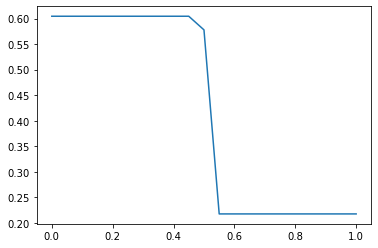

In [93]:
from matplotlib import pyplot as plt
plt.plot(thresholds, accuracies)

In [94]:
size_val = len(y_val)
baseline = np.repeat(False, size_val)

In [95]:
accuracy_score(baseline, y_val)

0.21777777777777776

### the accuracy of the baseline model is 21%

In [96]:
# make prediction threshold 0.4
t = 0.4
predict_churn = (y_pred >= t)
predict_no_churn = (y_pred < t)

# Get the actual target values
actual_churn = (y_val == 1)
actual_no_churn = (y_val == 0)

# Calculate true and false positives
true_positive = (predict_churn & actual_churn).sum()
false_positive = (predict_churn & actual_no_churn).sum()

# Calculate false and true negatives
false_negative = (predict_no_churn & actual_churn).sum()
true_negative = (predict_no_churn & actual_no_churn).sum()

In [97]:
# put all values together in array
confusion_table = np.array(
[[true_negative, false_positive],
[false_negative, true_positive]])

In [98]:
confusion_table

array([[  0,  49],
       [  0, 136]])

In [99]:
confusion_table / confusion_table.sum()

array([[0.        , 0.26486486],
       [0.        , 0.73513514]])

### With confusion matrix we can calculate accuracy

accuracty = (TN + TP) / (TN + TP + FN + FP)

In [100]:
(0 + 136) / (0 + 136 + 0 + 49)

0.7351351351351352

## Precision = TP / (TP + FP)

In [101]:
P = 136 / (136 + 49)

## Recall = TP / (TP + FN)

In [102]:
R = 136 / (136 + 0)

### FPR = FP / (FP + TN)
### TPR = TP / (TP + FN)

In [103]:
fpr = 49 / 49

In [104]:
tpr = 136 / 136

In [105]:
# create a list for results
scores = []

# create array with different threshold values 
thresholds = np.linspace(0, 1, 101)

# Loop and compute confusion table for epredictions at each threshold
for t in thresholds:
    tp = ((y_pred >= t) & (y_val == 1)).sum()
    fp = ((y_pred >= t) & (y_val == 0)).sum()
    fn = ((y_pred < t) & (y_val == 1)).sum()
    tn = ((y_pred < t) & (y_val == 0)).sum()
    
    # append results to the scores list
    scores.append((t, tp, fp, fn, tn))

In [106]:
# turn list into padnas df then assign names to columns of df
df_scores = pd.DataFrame(scores)
df_scores.columns = ['threshold', 'tp', 'fp', 'fn', 'tn']

In [107]:
# selects every 10th record of the df
df_scores[::10]

,threshold,tp,fp,fn,tn
0,0.0,136,49,0,0
10,0.1,136,49,0,0
20,0.2,136,49,0,0
30,0.3,136,49,0,0
40,0.4,136,49,0,0
50,0.5,109,28,27,21
60,0.6,0,0,136,49
70,0.7,0,0,136,49
80,0.8,0,0,136,49
90,0.9,0,0,136,49


In [108]:
df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)


In [109]:
df_scores[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,136,49,0,0,1.000000,1.000000
10,0.1,136,49,0,0,1.000000,1.000000
20,0.2,136,49,0,0,1.000000,1.000000
30,0.3,136,49,0,0,1.000000,1.000000
40,0.4,136,49,0,0,1.000000,1.000000
50,0.5,109,28,27,21,0.801471,0.571429
60,0.6,0,0,136,49,0.000000,0.000000
70,0.7,0,0,136,49,0.000000,0.000000
80,0.8,0,0,136,49,0.000000,0.000000
90,0.9,0,0,136,49,0.000000,0.000000


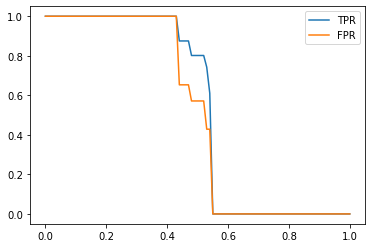

In [110]:
plt.plot(df_scores.threshold, df_scores.tpr, label='TPR')
plt.plot(df_scores.threshold, df_scores.fpr, label='FPR')
plt.legend()

In [111]:
# fix random seed for reproducibility
np.random.seed(1)
# generate an array with ranomd number between 0 and 1
y_rand = np.random.uniform(0, 1, size=len(y_val))

In [112]:
def tpr_fpr_dataframe(y_val, y_pred):
    scores = []
    
    thresholds = np.linspace(0, 1, 101)
    
    for t in thresholds:
        tp = ((y_pred >= t) & (y_val == 1)).sum()
        fp = ((y_pred >= t) & (y_val == 0)).sum()
        fn = ((y_pred < t) & (y_val == 1)).sum()
        tn = ((y_pred < t) & (y_val == 0)).sum()
        scores.append((t, tp, fp, fn, tn))
        
    df_scores = pd.DataFrame(scores)
    df_scores.columns = ['threshold', 'tp', 'fp', 'fn', 'tn']

    df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
    df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)
    
    return df_scores


In [113]:
df_rand = tpr_fpr_dataframe(y_val, y_rand)


In [114]:
np.random.seed(1)
y_rand = np.random.uniform(0, 1, size=len(y_val))
df_rand = tpr_fpr_dataframe(y_val, y_rand)
df_rand[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,136,49,0,0,1.000000,1.000000
10,0.1,123,40,13,9,0.904412,0.816327
20,0.2,106,31,30,18,0.779412,0.632653
30,0.3,95,26,41,23,0.698529,0.530612
40,0.4,85,21,51,28,0.625000,0.428571
50,0.5,76,19,60,30,0.558824,0.387755
60,0.6,57,16,79,33,0.419118,0.326531
70,0.7,40,13,96,36,0.294118,0.265306
80,0.8,29,9,107,40,0.213235,0.183673
90,0.9,21,4,115,45,0.154412,0.081633


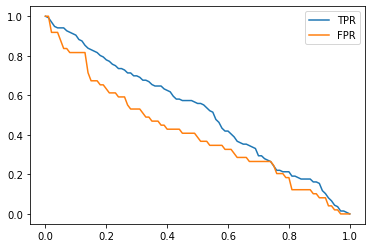

In [115]:
plt.plot(df_rand.threshold, df_rand.tpr, label='TPR')
plt.plot(df_rand.threshold, df_rand.fpr, label='FPR')
plt.legend()

In [116]:
num_neg = (y_val == 0).sum()
num_pos = (y_val == 1).sum()

y_ideal = np.repeat([0, 1], [num_neg, num_pos])
y_pred_ideal = np.linspace(0, 1, num_neg + num_pos)

df_ideal = tpr_fpr_dataframe(y_ideal, y_pred_ideal)

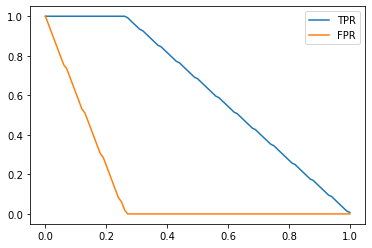

In [117]:
plt.plot(df_ideal.threshold, df_ideal.tpr, label='TPR')
plt.plot(df_ideal.threshold, df_ideal.fpr, label='FPR')
plt.legend()

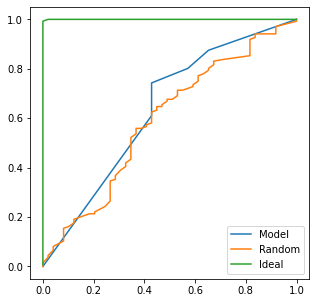

In [118]:
plt.figure(figsize=(5, 5))

plt.plot(df_scores.fpr, df_scores.tpr, label='Model')
plt.plot(df_rand.fpr, df_rand.tpr, label='Random')
plt.plot(df_ideal.fpr, df_ideal.tpr, label='Ideal')

plt.legend()

In [119]:
from sklearn.metrics import auc
auc(df_scores.fpr, df_scores.tpr)

0.6347539015606243

In [133]:
# from sklearn.metrics import roc_curve

# fpr, tpr, thresholds = roc_curve(y_val, y_pred)

# plt.figure(figsize=(5, 5))
# plt.plot(fpr, tpr)
# plt.plot([0, 1], [0, 1])

In [134]:
# from sklearn.metrics import roc_auc_score
# roc_auc_score(y_val, y_pred)

In [128]:
neg = y_pred[y_val == 0]
pos = y_pred[y_val == 1]

np.random.seed(1)
neg_choice = np.random.randint(low=0, high=len(neg), size=10000)
pos_choice = np.random.randint(low=0, high=len(pos), size=10000)
(pos[pos_choice] > neg[neg_choice]).mean()

0.5534

In [129]:
def train(df, y):
    cat = df[categorical + numerical].to_dict(orient='records')
    
    dv = DictVectorizer(sparse=False)
    dv.fit(cat)
    
    X = dv.transform(cat)
    
    model = LogisticRegression(solver='liblinear')
    model.fit(X, y)
    
    return dv, model

In [130]:
def predict(df, dv, model):
    cat = df[categorical + numerical].to_dict(orient='records')
    
    X = dv.transform(cat)
    y_pred = model.predict_proba(X)[:, 1]
    
    return y_pred

In [135]:
# from sklearn.model_selection import KFold

# kfold = KFold(n_splits=10, shuffle=True, random_state=1)

# aucs = []

# for train_idx, val_idx in kfold.split(df_train_full):
#     df_train = df_train_full.iloc[train_idx]
#     df_val = df_train_full.iloc[val_idx]
    
#     y_train = df_train.home_win.values
#     y_val = df_val.home_win.values
    
#     dv, model = train(df_train, y_train)
#     y_pred = predict(df_val, dv, model)

#     auc = roc_auc_score(y_val, y_pred)
#     aucs.append(auc)

In [136]:
# print('auc = %0.3f + %0.3f' % (np.mean(aucs), np.std(aucs)))